In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [2]:
from scipy import stats
import numpy as np

In [3]:
df = pd.read_excel("0727_2000Microns_4thMsmt.xlsx")
df

,Cab.Bridge,Voltage steps,V(PZT),V(PZT).1,Voltage diff,real_V,M-E Sensor (Channel 1),ME_D_CH1,ME_A_dis_CH1,M-E Sensor (Channel 2),ME_D_CH2,ME_A_dis_CH2,Fringes,Fringe_D,fringe_A_dis,Time
0,(bit),NaN,(monitor)(before entering code),(after entering code),NaN,NaN,(microns),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1853.16,NaN,NaN,1316.95,NaN,NaN,NaN,NaN,NaN,01:51:00
2,29303,NaN,-0.001,0.402,NaN,NaN,1853.08,NaN,NaN,1316.95,0.00,NaN,NaN,NaN,NaN,01:53:00
3,29703,NaN,0.408,1.478,1.076,14.78,1859.63,6.55,6.55,1323.33,6.38,6.38,21.0,6.6444,6.6444,01:55:00
4,30103,NaN,1.451,2.266,0.788,22.66,1866.19,6.56,13.11,1329.73,6.40,12.78,22.0,6.9608,13.6052,01:57:00
5,30503,NaN,2.23,3.009,0.743,30.09,1872.78,6.59,19.70,1336.15,6.42,19.20,19.0,6.0116,19.6168,01:59:00
6,30903,NaN,2.972,3.722,0.713,37.22,1879.46,6.68,26.38,1342.65,6.50,25.70,21.0,6.6444,26.2612,02:00:00
7,31303,NaN,3.678,4.43,0.708,44.30,1886.16,6.70,33.08,1349.18,6.53,32.23,17.0,5.3788,31.6400,02:02:00
8,31703,NaN,4.38,5.14,0.710,51.40,1892.86,6.70,39.78,1355.71,6.53,38.76,22.0,6.9608,38.6008,02:04:00
9,32103,NaN,5.06,5.83,0.690,58.30,1899.61,6.75,46.53,1362.28,6.57,45.33,21.0,6.6444,45.2452,02:06:00


In [4]:
#column of sensor 1 (channel 1)
ME_A_dis_CH1 = df["ME_A_dis_CH1"][3:27]
print(ME_A_dis_CH1)

3      6.55
4     13.11
5     19.70
6     26.38
7     33.08
8     39.78
9     46.53
10    53.31
11    59.91
12    67.84
13    75.81
14    83.84
15    75.77
16    67.77
17    59.79
18    53.15
19    46.35
20    39.58
21    32.86
22    26.15
23    19.48
24    12.86
25     6.34
26    -0.19
Name: ME_A_dis_CH1, dtype: float64


In [5]:
#column of sensor 2 (channel 2)
ME_A_dis_CH2 = df["ME_A_dis_CH2"][3:27]
print(ME_A_dis_CH2)

3      6.38
4     12.78
5     19.20
6     25.70
7     32.23
8     38.76
9     45.33
10    51.92
11    58.34
12    66.07
13    73.82
14    81.62
15    73.83
16    66.09
17    58.37
18    51.96
19    45.39
20    38.84
21    32.33
22    25.85
23    19.39
24    12.99
25     6.67
26     0.36
Name: ME_A_dis_CH2, dtype: float64


In [6]:
fringe_A_dis = df["fringe_A_dis"][3:27]
print(fringe_A_dis)

3      6.6444
4     13.6052
5     19.6168
6     26.2612
7     31.6400
8     38.6008
9     45.2452
10    51.5732
11    58.2176
12    65.8112
13    73.7212
14    81.3148
15    73.4048
16    64.5456
17    56.6356
18    49.6748
19    43.3468
20    36.7024
21    29.1088
22    22.7808
23    15.8200
24     8.5428
25     0.6328
26    -6.0116
Name: fringe_A_dis, dtype: float64


In [7]:
real_V = df["real_V"][3:27]
print(real_V)

3     14.78
4     22.66
5     30.09
6     37.22
7     44.30
8     51.40
9     58.30
10    65.30
11    72.30
12    80.60
13    89.10
14    97.60
15    81.40
16    68.90
17    57.70
18    49.30
19    40.70
20    33.06
21    25.67
22    18.56
23    11.80
24     5.48
25    -0.78
26    -6.76
Name: real_V, dtype: float64


In [9]:
x1 = fringe_A_dis
y1 = ME_A_dis_CH1

In [10]:
info = stats.linregress(x1,y1)
info

LinregressResult(slope=0.9887435786699218, intercept=2.855386372539421, rvalue=0.9977693752018545, pvalue=2.3193952680793835e-27, stderr=0.014103539018350202, intercept_stderr=0.6336838895058172)

<IPython.core.display.Javascript object>


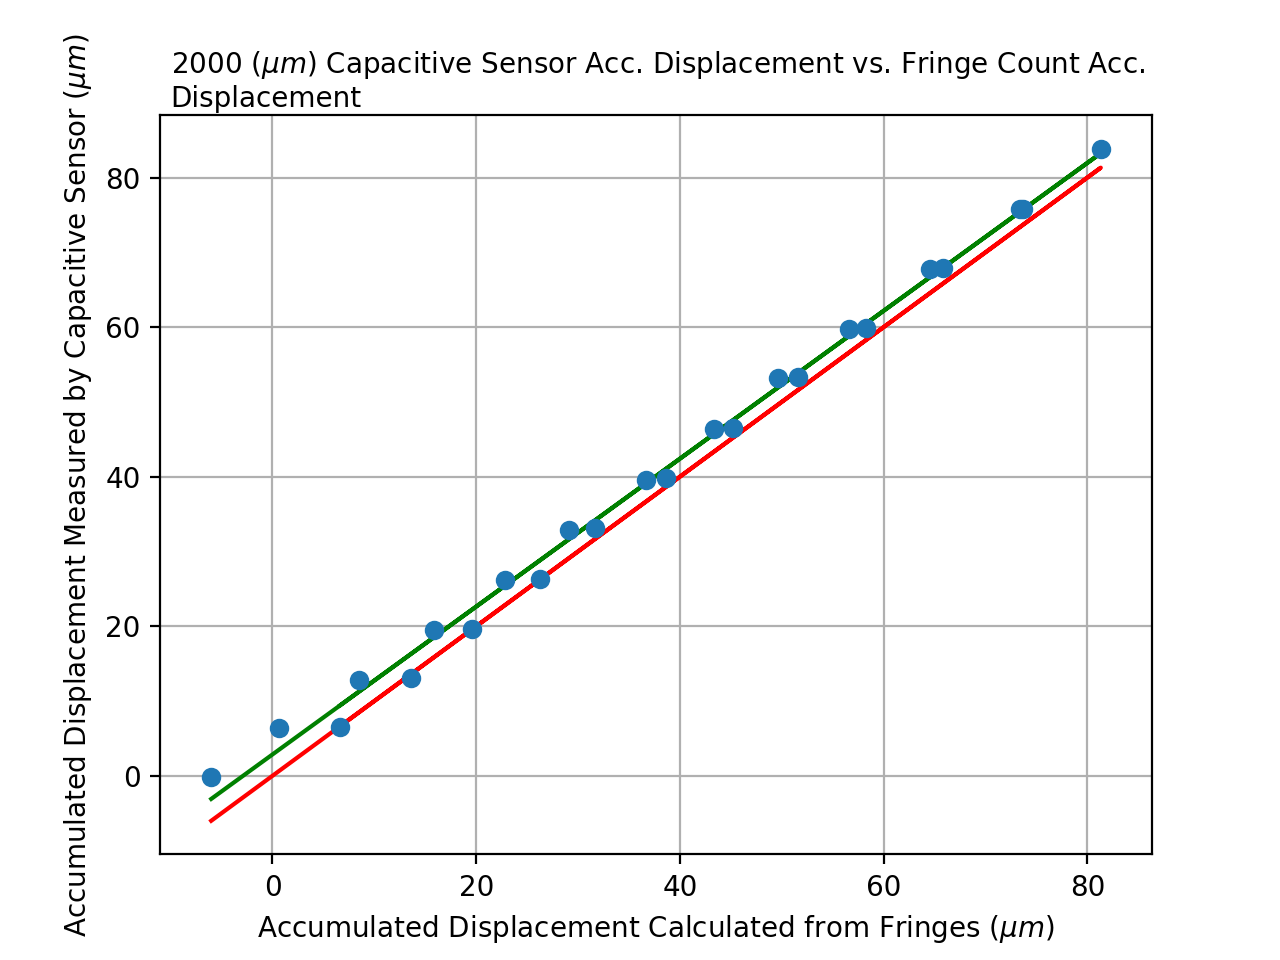

<function matplotlib.pyplot.show(block=None)>

In [12]:
#x error is 0.6
xerror = np.full_like(x1,0.6)
yerror = np.full_like(y1,0)

# plot of linear regression of data
plt.plot(x1,x1*info.slope+info.intercept,c = "green")

# plot of fringe displacement data, our "true" measurement
plt.plot(x1,x1,c = "red")

plt.errorbar(x1,y1,xerr=xerror,yerr=yerror,fmt = 'o')#,c = "orange")



plt.xlabel('Accumulated Displacement Calculated from Fringes ($\mu m$)')
plt.ylabel('Accumulated Displacement Measured by Capacitive Sensor ($\mu m$)')

t = '2000 ($\mu m$) Capacitive Sensor Acc. Displacement vs. Fringe Count Acc. Displacement'
plt.text(-10, 90, t, ha='left', rotation=0, wrap=True)



plt.grid()
plt.show

<IPython.core.display.Javascript object>


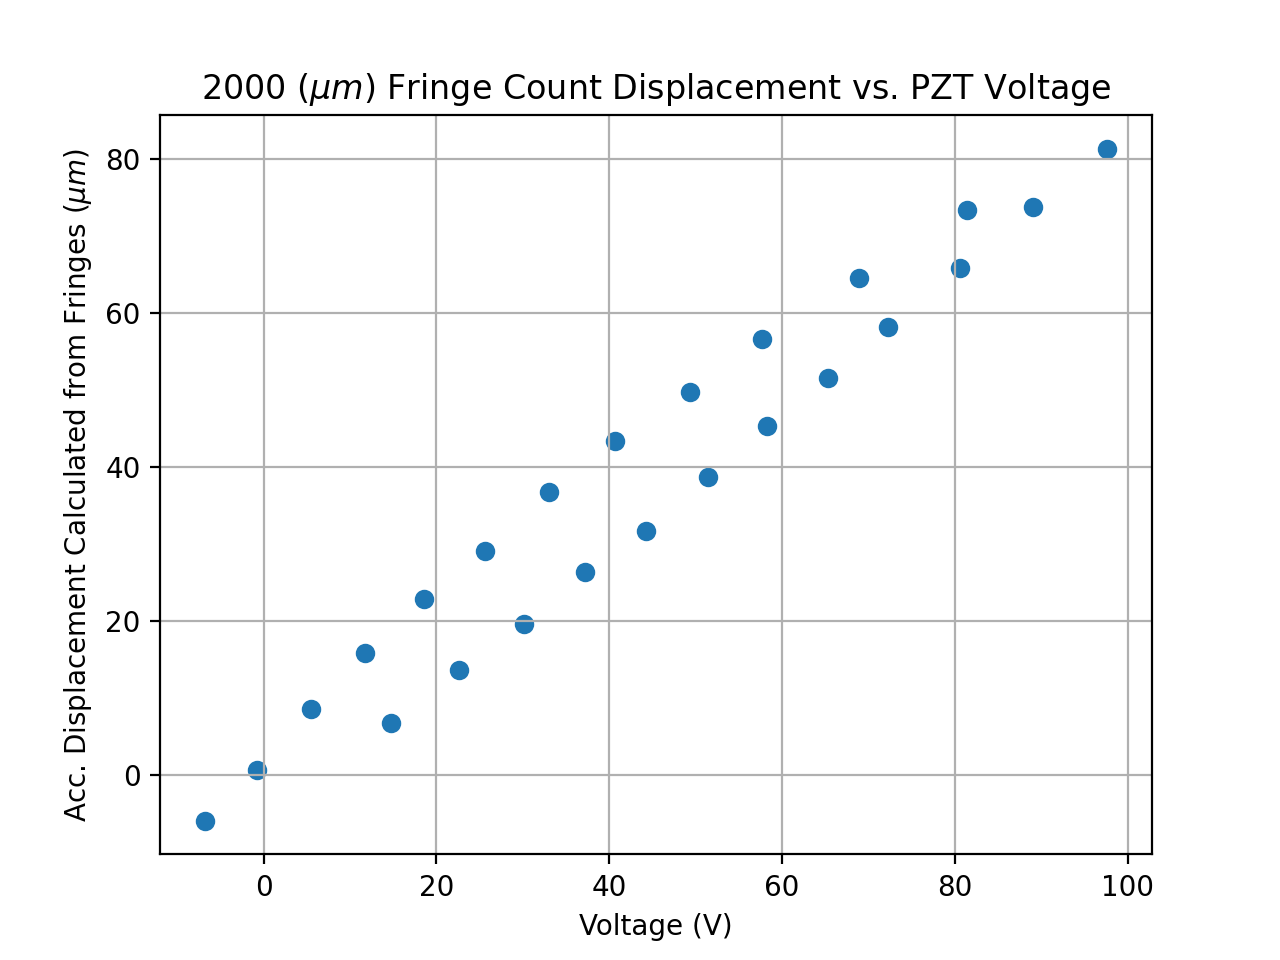

<function matplotlib.pyplot.show(block=None)>

In [20]:
plt.close("all")
x2 = real_V
y2 = fringe_A_dis

plt.scatter(x2,y2)


plt.xlabel('Voltage (V)')
plt.ylabel('Acc. Displacement Calculated from Fringes ($\mu m$)')
plt.title('2000 ($\mu m$) Fringe Count Displacement vs. PZT Voltage')


plt.grid()
plt.show

In [15]:
x3 = ME_A_dis_CH2
y3 = ME_A_dis_CH1

In [16]:
info_Sensors = stats.linregress(x3,y3)
info_Sensors

LinregressResult(slope=1.0313548596123545, intercept=-0.33649523096556777, rvalue=0.9999777290136397, pvalue=2.302580616743976e-49, stderr=0.0014675359769698972, intercept_stderr=0.06711873109619126)

<IPython.core.display.Javascript object>


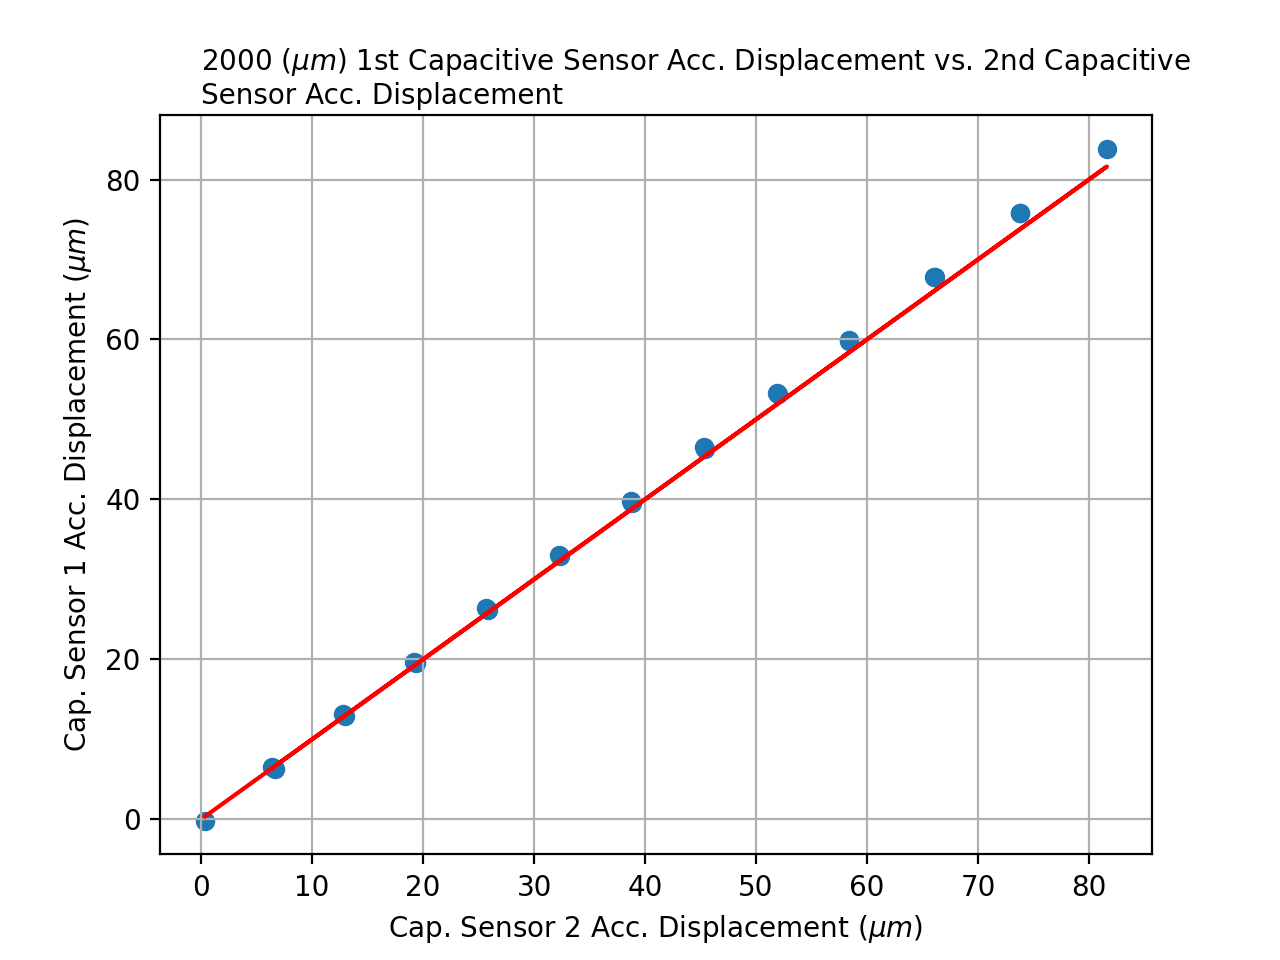

<function matplotlib.pyplot.show(block=None)>

In [19]:
#plot of first sensor vs. second sensor
plt.close("all")

#plot of our reference data, channel 2
plt.plot(x3,x3,c = "red")


plt.scatter(x3,y3)


plt.xlabel('Cap. Sensor 2 Acc. Displacement ($\mu m$)')
plt.ylabel('Cap. Sensor 1 Acc. Displacement ($\mu m$)')
t = '2000 ($\mu m$) 1st Capacitive Sensor Acc. Displacement vs. 2nd Capacitive Sensor Acc. Displacement'
plt.text(0, 90, t, ha='left', rotation=0, wrap=True)


plt.grid()
plt.show